$$\require{mhchem}$$       

# Homework 5
## Pengfei Cheng
## AndrewID: pengfeic

# Problem 1
Improving selectivity with a membrane reactor

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## Part A

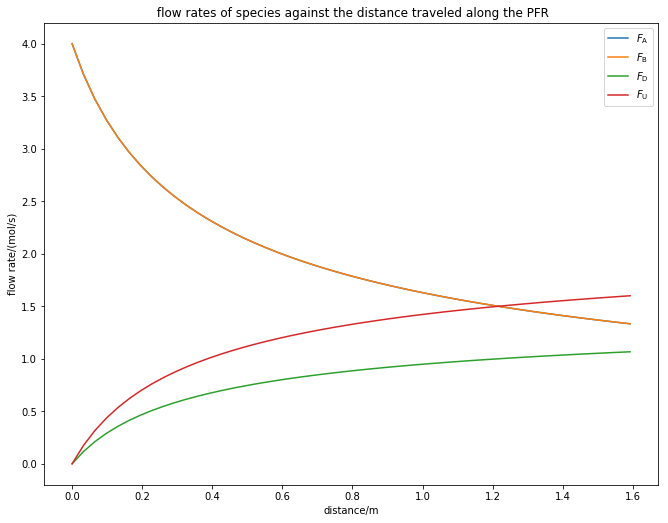

In [2]:
k1 = 2 # dm^6/mol^2
k2 = 3 # dm^6/mol^2
V = 50 # L
di = 20 # cm, inner diameter
s = np.array([[-1,-1,1,0],[-1,-1,0,1]]).T # stoichiometric numbers, referring to A, B, D, U respectively
F0 = np.array([4, 4, 0, 0]).T # mol/s
FT0 = np.sum (F0)
CT0 = 0.8 # mol/L
v0 = FT0 / CT0 # L/s

L = (V/1000) / (3.14 * (di / 100) ** 2 / 4) # m

def dFdl(F,l):
    'dFdl = dFdV*(pi*d^2/4))'
    FA, FB, FD, FU = F
    FT = np.sum (F)
    C = F / v0
    CA, CB, CD, CU = C
    
    r1 = k1 * CA ** 2 * CB
    r2 = k2 * CA * CB ** 2
    
    r = np.matmul (s, [r1,r2])
    return r * (3.14 * (di / 100) ** 2 / 4) * 1000 # convert dFdV (L) to dFdl (m)

lspan = np.linspace(0, L)
sol = odeint (dFdl, F0, lspan)

for i in range(4):
    plt.plot (lspan, sol[:,i])
plt.legend(['$F_\mathrm{A}$','$F_\mathrm{B}$','$F_\mathrm{D}$','$F_\mathrm{U}$'])
plt.xlabel('distance/m')
plt.ylabel('flow rate/(mol/s)')
plt.title(' flow rates of species against the distance traveled along the PFR')
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

con_PFR = sol[:,2] / F0[0]

In [3]:
FD_exit = sol[-1,2]
print ('The final molar flow rate of D is {:1.4f} mol/s.'.format(FD_exit))

The final molar flow rate of D is 1.0667 mol/s.


## Part B

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


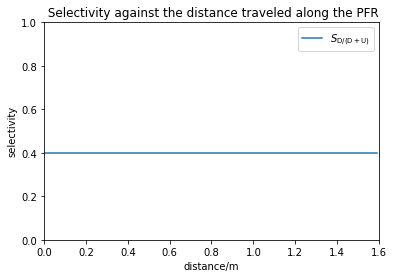

In [4]:
S = sol[:,2] / (sol[:,2] + sol[:,3])
S[0] = S[1]

plt.plot (lspan, S)
plt.legend(['$S_\mathrm{D/(D+U)}$'])
plt.xlabel('distance/m')
plt.ylabel('selectivity')
plt.title(' Selectivity against the distance traveled along the PFR')
plt.axis([0, 1.6, 0, 1])
plt.show()

## Part C

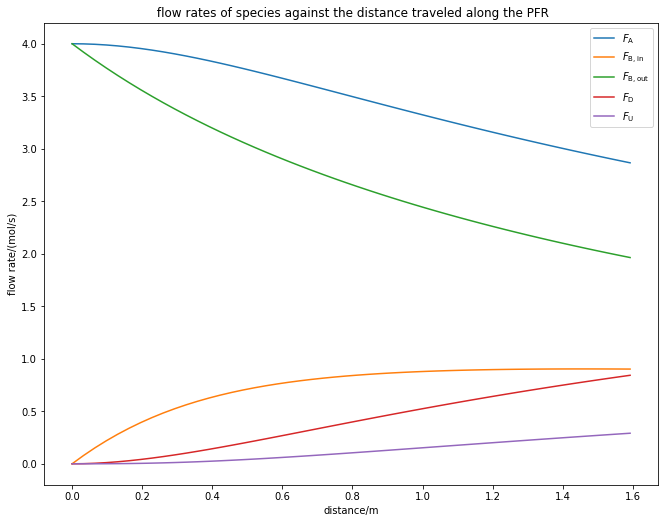

In [5]:
kcB=0.1 # dm/s
a = 4 / (di/10) # 1/dm 
s2 = np.array([[-1,-1,0,1,0],[-1,-1,0,0,1]]).T # stoichiometric numbers, referring to A, B_in, B_out, D, U respectively
F02 = np.array([4, 0, 4, 0, 0]).T # mol/s

def dFdl2(F,l):
    'dFdl = dFdV*(pi*d^2/4))'
    FA, FB_in, FB_out, FD, FU = F
    FT = np.sum (F)
    C = F / v0
    CA, CB_in, CB_out, CD, CU = C
    
    r1 = k1 * CA ** 2 * CB_in
    r2 = k2 * CA * CB_in ** 2
    
    RB = kcB * a * (CB_in - CB_out)
    
    r = np.matmul (s2, [r1,r2])
    r[1] += - RB
    r[2] += + RB
    return r * (3.14 * (di / 100) ** 2 / 4) * 1000 # convert dFdV (L) to dFdl (m)

sol = odeint (dFdl2, F02, lspan)

for i in range(5):
    plt.plot (lspan, sol[:,i])
plt.legend(['$F_\mathrm{A}$','$F_\mathrm{B,in}$','$F_\mathrm{B,out}$','$F_\mathrm{D}$','$F_\mathrm{U}$'])
plt.xlabel('distance/m')
plt.ylabel('flow rate/(mol/s)')
plt.title(' flow rates of species against the distance traveled along the PFR')
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

## Part D

In [6]:
def FindB(FB0):
    F02 = np.array([4, 0, FB0, 0, 0]).T # mol/s
    FT02 = np.sum(F02)
    sol = odeint (dFdl2, F02, lspan)
    return sol[-1,3] - FD_exit

FB02, info, ier, msg = fsolve (FindB, 5, full_output = 1)
print('The initial molar flowrate of B would be {:1.4f} mol/s to make the final flowrate of D reaches {:1.4f} mol/s.'.format(FB02[0], FD_exit))

The initial molar flowrate of B would be 6.0578 mol/s to make the final flowrate of D reaches 1.0667 mol/s.


## Part E

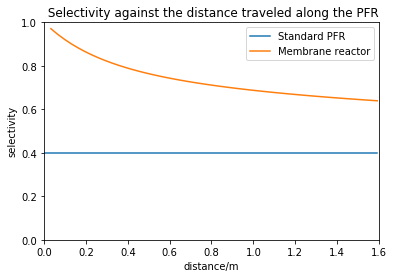

In [7]:
F02 = np.array([4, 0, FB02, 0, 0]).T

sol = odeint (dFdl2, F02, lspan)

S2 = sol[1:,3] / (sol[1:,3] + sol[1:,4])

plt.plot (lspan, S, lspan[1:], S2)
plt.legend(['Standard PFR', 'Membrane reactor'])
plt.xlabel('distance/m')
plt.ylabel('selectivity')
plt.title(' Selectivity against the distance traveled along the PFR')
plt.axis([0, 1.6, 0, 1])
plt.show()

con = sol[:,3] / F0[0] # define the conversion, F_D/F_A0

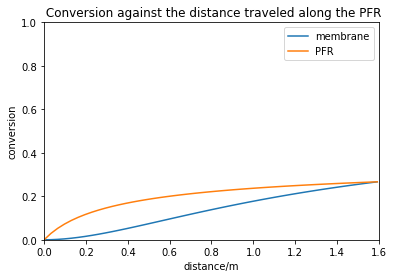

In [8]:
plt.plot(lspan, con, lspan, con_PFR)
plt.legend(['membrane','PFR'])
plt.xlabel('distance/m')
plt.ylabel('conversion')
plt.title(' Conversion against the distance traveled along the PFR')
plt.axis([0, 1.6, 0, 1])
plt.show()

The membrane reactor has absolutely higher selectivity than the standard PFR along the length of the reactors. However, the conversion of B in the membrane reactor is lower than in the PFR. 

If the separation of products and reactants are not costly, I would choose the membrane reactor and build a loop flow to improve the conversion. Otherwise I would rather use PFR. In real life, the values of desirable and undesirable products, the cost of separation and other factors would all affect the decision.

# Bonus

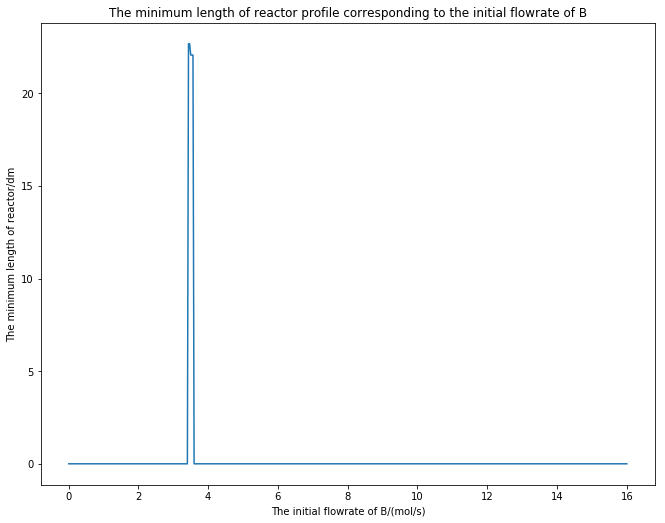

The minimum length of the reactor is 22 dm when the initial flowrate is 3.503 mol/s.


In [9]:
xi_max = F0[0] / 0.25


def findminl(FB0):
    
    F02 = np.array([4, 0, FB0, 0, 0]).T
    lspan = np.linspace(0.01, 3)
    sol = odeint (dFdl2, F02, lspan)
    
    S = sol[1:,3] / (sol[1:,3] + sol[1:,4])
    con = sol[:,3] / F0[0]
    
    # find the max length to keep the selectivity > 75%

    for i in range (49):
        l1 = 0
        if S[i] <= 0.75:
            l1 = lspan[i-1]
            break

    # find the min length to keep the conversion > 25%

    for i in range (50):
        l2 = 0
        if con[i] > 0.25:
            l2 = lspan[i]
            break
    if l1 >= l2:
        return l2
    else:
        return 0
    # nonzero value means the minimum length that meets the criteria exists

FBspan = np.linspace(0.01, xi_max, 500)
minl = np.array(list(map(findminl, FBspan)))
plt.plot(FBspan, minl * 10)
plt.xlabel('The initial flowrate of B/(mol/s)')
plt.ylabel('The minimum length of reactor/dm')
plt.title ('The minimum length of reactor profile corresponding to the initial flowrate of B')
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

minl2 = [l for l in minl if l not in [0]]
l_min = np.amin(minl2)

for i in range(500):
    if minl[i] == l_min:
        FB_min = FBspan[i]
        break

print ('The minimum length of the reactor is {:1.0f} dm when the initial flowrate is {:1.3f} mol/s.'.format(l_min * 10, FB_min))